# ANOMALY DETECTION USING AUTOENCODER with Credit Card Fraud (Kaggle)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras import regularizers

In [ ]:
# Step 2: Load Dataset
# (If running locally, upload creditcard.csv or mount drive)
url = "https://storage.googleapis.com/download.tensorflow.org/data/creditcard.csv"
df = pd.read_csv(url)

print("Dataset shape:", df.shape)
print(df.head())

Dataset shape: (284807, 31)
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

    

In [ ]:
# Step 3: Data Preprocessing
# Separate features and labels
X = df.drop(columns=['Class'])
y = df['Class']

# Normalize 'Amount' and 'Time'
scaler = StandardScaler()
X[['Time', 'Amount']] = scaler.fit_transform(X[['Time', 'Amount']])

# Split train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Only use normal transactions (Class=0) for training
X_train_normal = X_train[y_train == 0]

print(f"Training samples (normal): {X_train_normal.shape[0]}")
print(f"Testing samples: {X_test.shape[0]}")

Training samples (normal): 199008
Testing samples: 85443


In [ ]:
# Step 4: Build Autoencoder
input_dim = X_train_normal.shape[1]

input_layer = Input(shape=(input_dim,))
encoded = Dense(16, activation='relu', activity_regularizer=regularizers.l1(1e-5))(input_layer)
encoded = Dense(8, activation='relu')(encoded)
encoded = Dense(4, activation='relu')(encoded)

decoded = Dense(8, activation='relu')(encoded)
decoded = Dense(16, activation='relu')(decoded)
decoded = Dense(input_dim, activation='sigmoid')(decoded)

autoencoder = Model(inputs=input_layer, outputs=decoded)
autoencoder.compile(optimizer='adam', loss='mse')

autoencoder.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 30)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 16)             │           496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 8)              │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 16)             │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 30)             │           510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,362 (5.32 KB)

 Trainable params: 1,362 (5.32 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Step 5: Train Autoencoder
history = autoencoder.fit(
    X_train_normal, X_train_normal,
    epochs=20,
    batch_size=256,
    shuffle=True,
    validation_split=0.1,
    verbose=1
)


Epoch 1/20
700/700 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 1.1250 - val_loss: 0.9464
Epoch 2/20
700/700 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.9624 - val_loss: 0.9138
Epoch 3/20
700/700 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.9324 - val_loss: 0.9054
Epoch 4/20
700/700 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.9110 - val_loss: 0.8990
Epoch 5/20
700/700 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.9254 - val_loss: 0.8955
Epoch 6/20
700/700 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.9247 - val_loss: 0.8918
Epoch 7/20
700/700 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.9097 - val_loss: 0.8897
Epoch 8/20
700/700 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.9078 - val_loss: 0.8882
Epoch 9/20
700/700 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.8954 - val_loss: 0.8854
Epoch 10/20
700/700 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.9069 - val_loss: 0.8839
Epoch 11/20
700/700 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.9123 - val_loss: 0.8826
Epoch 12/20
700/700 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step

We are training an autoencoder to reconstruct only normal (non-anomalous) data.

After training, we want to find a cutoff value (threshold) that separates:

✅ Normal samples (that reconstruct well → small error)

❌ Anomalies (that reconstruct poorly → large error)

That cutoff is called the reconstruction error threshold.

In [ ]:
# Step 6: Evaluate on Test Data
X_test_pred = autoencoder.predict(X_test)
reconstruction_error = np.mean(np.square(X_test - X_test_pred), axis=1)

# Calculate threshold using normal data
X_train_pred = autoencoder.predict(X_train_normal)
train_recon_error = np.mean(np.square(X_train_normal - X_train_pred), axis=1)
threshold = np.percentile(train_recon_error, 99) #99th percentile => the value below which 99% of all errors fall
#Assume there are 10 errors on the normal samples with SORTED data as [0.5, 0.7, 0.9, 1.1, 1.4, 1.6, 1.8, 2.2, 3.5, 7.7]
#99% of 10 = 9.9 → So we pick the value  10th sorted values. That value is roughly 7.7
print(f"Reconstruction Error Threshold: {threshold:.6f}")



2671/2671 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
6219/6219 ━━━━━━━━━━━━━━━━━━━━ 6s 979us/step
Reconstruction Error Threshold: 7.703363


Now, when you test on new data:

If a new sample’s reconstruction error ≤ 7.7 → classify as Normal

If a new sample’s reconstruction error > 7.7 → classify as Anomaly

In [ ]:
# Step 7: Predict Anomalies
y_pred = (reconstruction_error > threshold).astype(int)




Confusion Matrix:


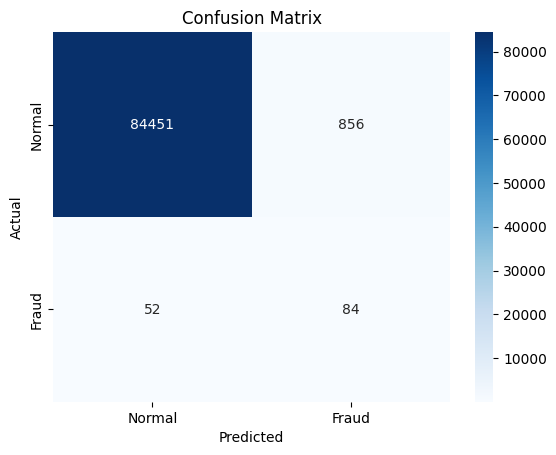


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     85307
           1       0.09      0.62      0.16       136

    accuracy                           0.99     85443
   macro avg       0.54      0.80      0.58     85443
weighted avg       1.00      0.99      0.99     85443



In [ ]:
# Step 8: Evaluate Model
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal','Fraud'], yticklabels=['Normal','Fraud'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred))



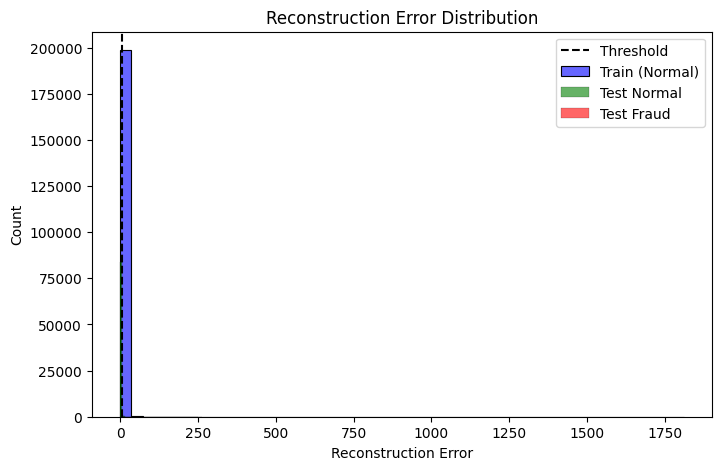

In [ ]:
# Step 9: Plot Reconstruction Error Distribution
plt.figure(figsize=(8,5))
sns.histplot(train_recon_error, bins=50, label="Train (Normal)", color='blue', alpha=0.6)
sns.histplot(reconstruction_error[y_test==0], bins=50, label="Test Normal", color='green', alpha=0.6)
sns.histplot(reconstruction_error[y_test==1], bins=50, label="Test Fraud", color='red', alpha=0.6)
plt.axvline(threshold, color='black', linestyle='--', label='Threshold')
plt.legend()
plt.title("Reconstruction Error Distribution")
plt.xlabel("Reconstruction Error")
plt.show()

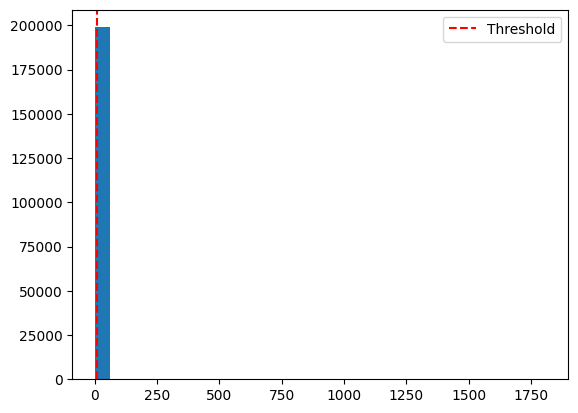

In [ ]:
plt.hist(train_recon_error, bins=30)
plt.axvline(threshold, color='red', linestyle='--', label='Threshold')
plt.legend()
plt.show()

## **With different percentile**

In [ ]:
# Calculate threshold using normal data
X_train_pred = autoencoder.predict(X_train_normal)
train_recon_error = np.mean(np.square(X_train_normal - X_train_pred), axis=1)
threshold = np.percentile(train_recon_error, 95)
print(f"Reconstruction Error Threshold: {threshold:.6f}")


6219/6219 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step
Reconstruction Error Threshold: 1.873272


In [ ]:
# Step 7: Predict Anomalies
y_pred = (reconstruction_error > threshold).astype(int)




Confusion Matrix:


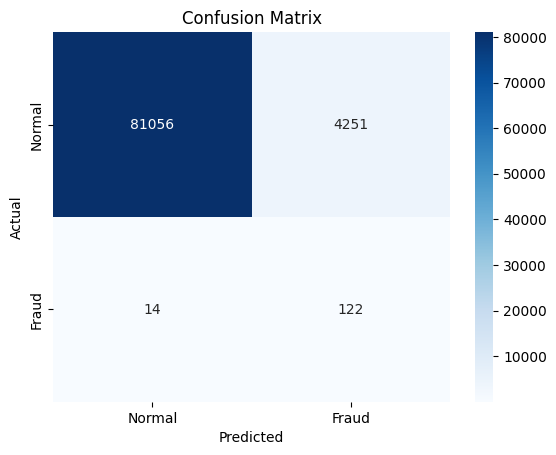


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.97     85307
           1       0.03      0.90      0.05       136

    accuracy                           0.95     85443
   macro avg       0.51      0.92      0.51     85443
weighted avg       1.00      0.95      0.97     85443



In [ ]:
# Step 8: Evaluate Model
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal','Fraud'], yticklabels=['Normal','Fraud'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

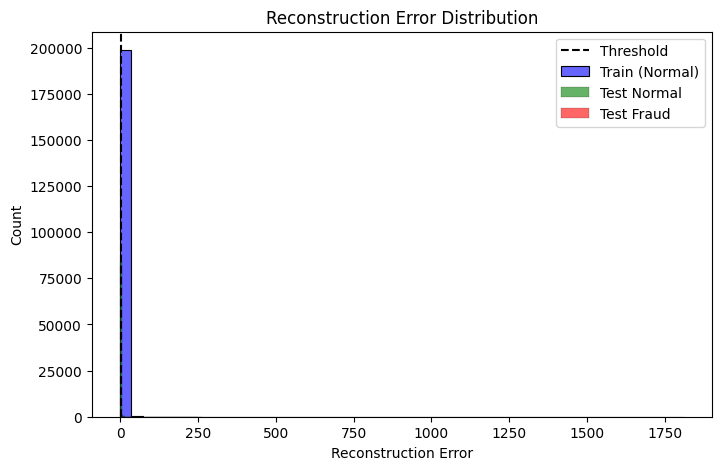

In [ ]:
# Step 9: Plot Reconstruction Error Distribution
plt.figure(figsize=(8,5))
sns.histplot(train_recon_error, bins=50, label="Train (Normal)", color='blue', alpha=0.6)
sns.histplot(reconstruction_error[y_test==0], bins=50, label="Test Normal", color='green', alpha=0.6)
sns.histplot(reconstruction_error[y_test==1], bins=50, label="Test Fraud", color='red', alpha=0.6)
plt.axvline(threshold, color='black', linestyle='--', label='Threshold')
plt.legend()
plt.title("Reconstruction Error Distribution")
plt.xlabel("Reconstruction Error")
plt.show()